# 第五讲 无标度网络

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
# 'serif', 'sans-serif', 'monospace', 'fantasy', 'cursive'
cnFont = {'fontname':'Songti SC', 'color':'darkred', 'weight':'bold', 'size': 30}
plt.rcParams['figure.dpi'] = 400
import seaborn as sns
import scienceplots
import numpy as np
from scipy import stats
from scipy import optimize
import pandas as pd
from pandas import Series,DataFrame
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

import networkx as nx
import powerlaw

## 无标度网络度分布拟合

In [3]:
# 加载openFlights数据集
df = pd.read_csv("data/openFlights.edgelist.csv")
G = nx.from_pandas_edgelist(df, 'source', 'target', create_using = nx.Graph())

In [31]:
degree_histogram = nx.degree_histogram(G)
K = np.array(list(range(0, len(degree_histogram))))
Pk = np.array([ degree_histogram[k]/G.number_of_nodes() for k in range(0, len(degree_histogram))])
zero_index = np.where(Pk == 0)
K = np.delete(K, zero_index)
Pk = np.delete(Pk, zero_index)

In [108]:
def func1(k, gamma, C):
    return C * k**(-gamma)
gamma1, C1 = optimize.curve_fit(func1, K[3:], Pk[3:])[0]

def func2(x, a, b):
    return -a * x + b
gamma2, b = optimize.curve_fit(func2, np.log10(K[3:]), np.log10(Pk[3:]))[0]
C2 = np.exp(b)

degrees = [G.degree(node) for node in G.nodes()]
fit = powerlaw.Fit(degrees)
kMin = fit.power_law.xmin
gamma3 = fit.power_law.alpha
D3 = fit.power_law.D

def func3(k, C):
    return C * k**(-gamma3)
C3 = optimize.curve_fit(func3, K[3:], Pk[3:])[0][0]
# C3 = 1/sum([i**(-gamma3) for i in np.arange(1,100000)])

Pk_fit1 = C1 * K**(-gamma1)
Pk_fit2 = C2 * K**(-gamma2)
Pk_fit3 = C3 * K**(-gamma3)
print(gamma1, C1)
print(gamma2, C2)
print(gamma3, C3)

Calculating best minimal value for power law fit
1.632640277304837 0.6545181121440351
1.3370539896117166 0.5490803595657138
1.9028919860606162 1.021858310165598


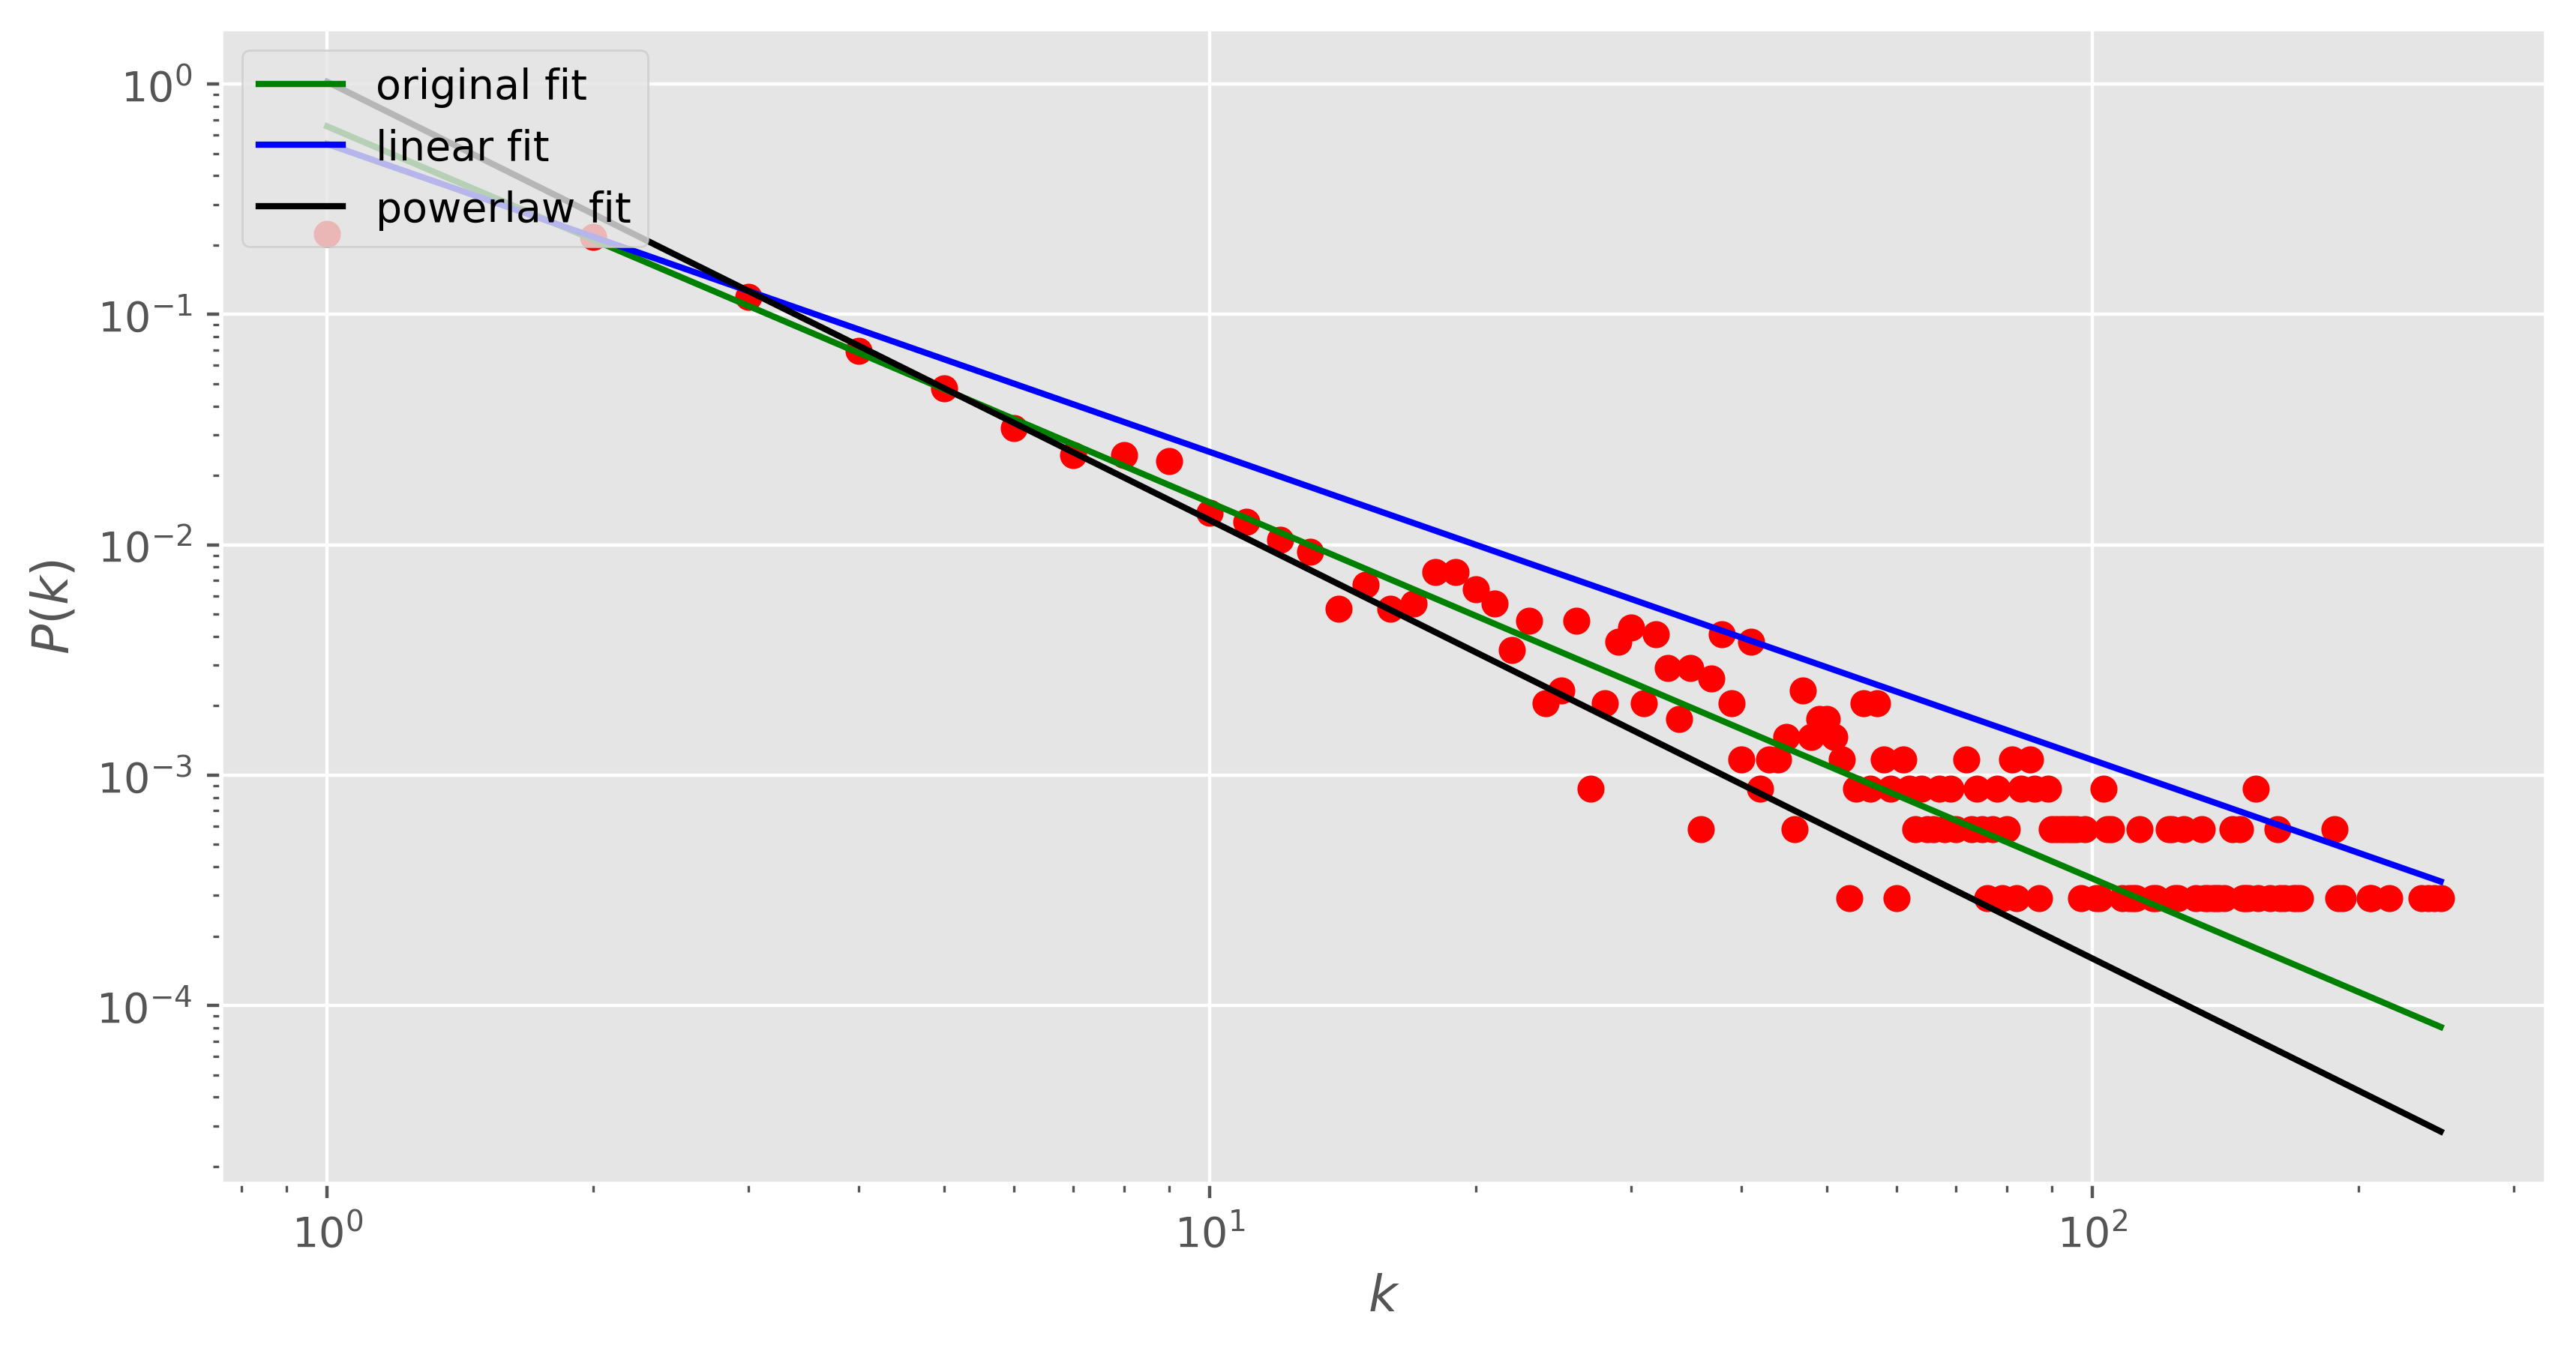

In [109]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    plt.scatter(K, Pk, color='red')
    plt.plot(K, Pk_fit1, color='green', label='original fit')
    plt.plot(K, Pk_fit2, color='blue',  label='linear fit')
    plt.plot(K, Pk_fit3, color='black', label='powerlaw fit')
    plt.legend(loc='upper left')
    ax.set_xlabel('$k$')
    ax.set_ylabel('$P(k)$')
    ax.set_xticks(K)
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.show()